In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
# this package is used to connect to the SQL server
from sqlalchemy import create_engine

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# set the parameter
user_name = "guest"
password = "relational"
hostname = "relational.fit.cvut.cz"
port = "3306"
database = "classicmodels"

# create an engine
con_remote = create_engine(
    f"mysql+pymysql://{user_name}:{password}@{hostname}:{port}/{database}"
)

In [3]:
# write a sql query here.
# It will be much easier if you use an admin tools to do this
sql = """
SELECT TABLE_NAME 
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' AND TABLE_SCHEMA='classicmodels'
"""

# get the data with the engine we created
df_table_names = pd.read_sql(sql, con=con_remote)
df_table_names

,TABLE_NAME
0,customers
1,employees
2,offices
3,orderdetails
4,orders
5,payments
6,productlines
7,products


### Looking at our data

In [4]:

sql = """

SELECT * FROM customers 


"""

In [5]:
df_customers = pd.read_sql(sql, con=con_remote)

In [6]:
df_customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.0


In [7]:

sql = """

SELECT * FROM employees


"""

In [8]:
df_employees = pd.read_sql(sql, con=con_remote)

In [9]:
df_employees.head()

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,NaN,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)


In [10]:

sql = """

SELECT * FROM offices


"""

In [11]:
df_offices = pd.read_sql(sql, con=con_remote)

In [12]:
df_offices.head()

,officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
0,1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
1,2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
2,3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
3,4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,None,None,France,75017,EMEA
4,5,Tokyo,+81 33 224 5000,4-1 Kioicho,None,Chiyoda-Ku,Japan,102-8578,Japan


In [13]:

sql = """

SELECT * FROM orderdetails


"""

In [14]:
df_orderdetails = pd.read_sql(sql, con=con_remote)

In [15]:
df_orderdetails.head()

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4


In [16]:

sql = """

SELECT * FROM orders


"""

In [17]:
df_orders = pd.read_sql(sql, con=con_remote)

In [18]:
df_orders.head()

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141


In [19]:
df_customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.0


### Joining our tables using SQL

In [20]:
sql = """

SELECT 
c.customerNumber, c.CustomerName,
a.orderNumber,a.orderDate,
b.productCode, b.quantityOrdered, b.priceEach
FROM orders a 
INNER JOIN orderdetails b 
ON a.orderNumber=b.orderNumber 
INNER JOIN customers c 
ON a.customerNumber=c.customerNumber;

"""

In [21]:
df_file = pd.read_sql(sql, con=con_remote)

In [22]:
df_file

,customerNumber,CustomerName,orderNumber,orderDate,productCode,quantityOrdered,priceEach
0,363,Online Diecast Creations Co.,10100,2003-01-06,S18_1749,30,136.00
1,363,Online Diecast Creations Co.,10100,2003-01-06,S18_2248,50,55.09
2,363,Online Diecast Creations Co.,10100,2003-01-06,S18_4409,22,75.46
3,363,Online Diecast Creations Co.,10100,2003-01-06,S24_3969,49,35.29
4,128,"Blauer See Auto, Co.",10101,2003-01-09,S18_2325,25,108.06
...,...,...,...,...,...,...,...
2991,119,La Rochelle Gifts,10425,2005-05-31,S24_2300,49,127.79
2992,119,La Rochelle Gifts,10425,2005-05-31,S24_2840,31,31.82
2993,119,La Rochelle Gifts,10425,2005-05-31,S32_1268,41,83.79
2994,119,La Rochelle Gifts,10425,2005-05-31,S32_2509,11,50.32


In [23]:
## Checking if any of our columns are empty
df_file.isnull().sum()

customerNumber     0
CustomerName       0
orderNumber        0
orderDate          0
productCode        0
quantityOrdered    0
priceEach          0
dtype: int64

#### No null values in our data

In [24]:
#let us check the quantity if any negative values
df_file = df_file[(df_file['quantityOrdered']>0)]

In [25]:
df_file.shape

(2996, 7)

In [26]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2995
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerNumber   2996 non-null   int64  
 1   CustomerName     2996 non-null   object 
 2   orderNumber      2996 non-null   int64  
 3   orderDate        2996 non-null   object 
 4   productCode      2996 non-null   object 
 5   quantityOrdered  2996 non-null   int64  
 6   priceEach        2996 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 187.2+ KB


In [27]:
df_file

,customerNumber,CustomerName,orderNumber,orderDate,productCode,quantityOrdered,priceEach
0,363,Online Diecast Creations Co.,10100,2003-01-06,S18_1749,30,136.00
1,363,Online Diecast Creations Co.,10100,2003-01-06,S18_2248,50,55.09
2,363,Online Diecast Creations Co.,10100,2003-01-06,S18_4409,22,75.46
3,363,Online Diecast Creations Co.,10100,2003-01-06,S24_3969,49,35.29
4,128,"Blauer See Auto, Co.",10101,2003-01-09,S18_2325,25,108.06
...,...,...,...,...,...,...,...
2991,119,La Rochelle Gifts,10425,2005-05-31,S24_2300,49,127.79
2992,119,La Rochelle Gifts,10425,2005-05-31,S24_2840,31,31.82
2993,119,La Rochelle Gifts,10425,2005-05-31,S32_1268,41,83.79
2994,119,La Rochelle Gifts,10425,2005-05-31,S32_2509,11,50.32


In [28]:
#check for minimum quantity ordered
df_file.quantityOrdered.min()

6

In [29]:
df_file['TotalPrice'] = df_file['quantityOrdered'] * df_file['priceEach']

In [30]:
df_file

,customerNumber,CustomerName,orderNumber,orderDate,productCode,quantityOrdered,priceEach,TotalPrice
0,363,Online Diecast Creations Co.,10100,2003-01-06,S18_1749,30,136.00,4080.00
1,363,Online Diecast Creations Co.,10100,2003-01-06,S18_2248,50,55.09,2754.50
2,363,Online Diecast Creations Co.,10100,2003-01-06,S18_4409,22,75.46,1660.12
3,363,Online Diecast Creations Co.,10100,2003-01-06,S24_3969,49,35.29,1729.21
4,128,"Blauer See Auto, Co.",10101,2003-01-09,S18_2325,25,108.06,2701.50
...,...,...,...,...,...,...,...,...
2991,119,La Rochelle Gifts,10425,2005-05-31,S24_2300,49,127.79,6261.71
2992,119,La Rochelle Gifts,10425,2005-05-31,S24_2840,31,31.82,986.42
2993,119,La Rochelle Gifts,10425,2005-05-31,S32_1268,41,83.79,3435.39
2994,119,La Rochelle Gifts,10425,2005-05-31,S32_2509,11,50.32,553.52


In [31]:
max_date = df_file['orderDate'].max()
max_date

datetime.date(2005, 5, 31)

### Grouping by to create a RFM table

In [32]:
rfmTable = df_file.groupby('customerNumber').agg({'orderDate':max,'customerNumber':len,'TotalPrice':sum})

In [33]:
rfmTable.orderDate = max_date - rfmTable.orderDate

In [34]:
rfmTable

,orderDate,customerNumber,TotalPrice
customerNumber,,,
103,187 days,7,22314.36
112,183 days,29,80180.98
114,183 days,55,180585.07
119,0 days,53,158573.12
121,207 days,32,104224.79
...,...,...,...
486,195 days,23,77726.59
487,476 days,15,42570.37
489,495 days,12,29586.15


In [35]:
rfmTable.columns = ["Recency", "Frequency", "Monetary"]
rfmTable.Recency = rfmTable.Recency.dt.days

In [36]:
rfmTable

,Recency,Frequency,Monetary
customerNumber,,,
103,187,7,22314.36
112,183,29,80180.98
114,183,55,180585.07
119,0,53,158573.12
121,207,32,104224.79
...,...,...,...
486,195,23,77726.59
487,476,15,42570.37
489,495,12,29586.15


### Fitting our Model

In [37]:
from yellowbrick.cluster import KElbowVisualizer

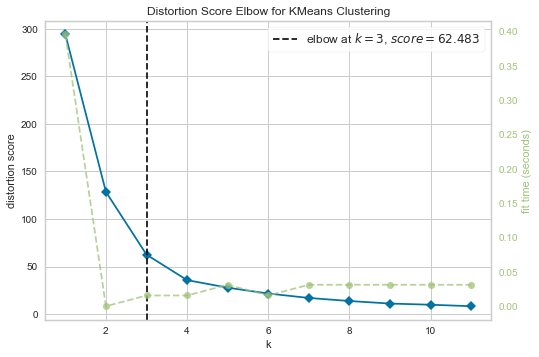

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
## Finding our our right cluster
scaler = StandardScaler()
scaler.fit(rfmTable)
X = scaler.transform(rfmTable)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))

visualizer.fit(X)  # Fit the data to the visualizer
visualizer.show()

In [43]:
pipe = make_pipeline(StandardScaler(), KMeans(n_clusters=3))

In [44]:
pipe.fit(rfmTable)
clusters = pipe.predict(rfmTable)

In [46]:
clustering_result = rfmTable.copy()
clustering_result["cluster"] = clusters
clustering_result

,Recency,Frequency,Monetary,cluster
customerNumber,,,,
103,187,7,22314.36,0
112,183,29,80180.98,0
114,183,55,180585.07,0
119,0,53,158573.12,0
121,207,32,104224.79,0
...,...,...,...,...
486,195,23,77726.59,0
487,476,15,42570.37,2
489,495,12,29586.15,2


In [47]:
clustering_result.groupby('cluster').mean()

,Recency,Frequency,Monetary
cluster,,,
0,140.341463,28.219512,90411.334878
1,1.000000,219.500000,706258.440000
2,457.285714,17.357143,55567.447857


In [49]:
## Normalizing our data
datamart_normalized = pd.DataFrame(X, index=rfmTable.index, columns=rfmTable.columns)
datamart_normalized["Cluster"] = clustering_result["cluster"]
datamart_normalized

,Recency,Frequency,Monetary,Cluster
customerNumber,,,,
103,0.030551,-0.784958,-0.784832,0
112,0.001623,-0.052331,-0.184792,0
114,0.001623,0.813502,0.856334,0
119,-1.321811,0.746900,0.628084,0
121,0.175189,0.047573,0.064527,0
...,...,...,...,...
486,0.088406,-0.252138,-0.210242,0
487,2.120565,-0.518548,-0.574790,2
489,2.257970,-0.618452,-0.709428,2


#### <li> We can see Cluster 1 is the most important customers for us. <li> Cluster 0 and 2 are spending less compared to Cluster 1. <li> We can provide different promotions to increase our sales for Cluster 0 and 2 and make more profits.

In [50]:
datamart_melt = pd.melt(
    datamart_normalized.reset_index(),
    id_vars=["customerNumber", "Cluster"],
    value_vars=["Recency", "Frequency", "Monetary"],
    var_name="Attribute",
    value_name="Value",
)

<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

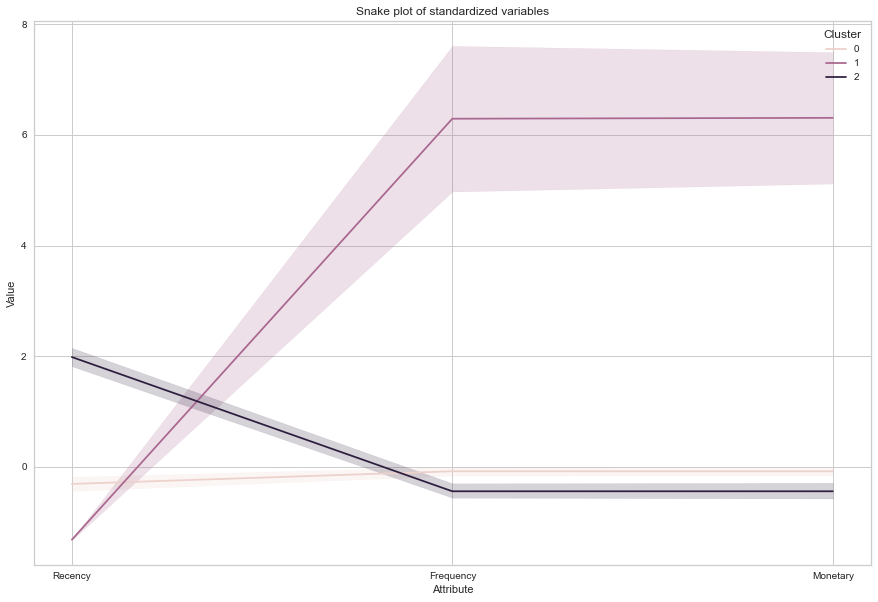

In [51]:
#making a snake plot for visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.title("Snake plot of standardized variables")
sns.lineplot(x="Attribute", y="Value", hue="Cluster", data=datamart_melt)